# DSI Project 2: Ames Iowa Housing Data
# Problem Statement:
## Given the available data (2006-10):
### What factors most affect Property Sale Prices?
### Is it possible to accurately predict Property Sale Prices based on these factors?

### An analysis of available data was done, and a model was succesfully constructed based on this data.

**Suggested Next Steps:**  
The accuracy of the model can be increased by adding more features  
More advanced numerical techniques should be employed to improved the results  
Collect Data on Neighborhood Socioeconomic Considerations, e.g. Average Income,  Unemployment Percentages, etc. Add to model to better understand home prices on a neighborhood level.


In [341]:
# We'll import the libraries we'll be using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [294]:
# We will first read in our data and look at it
df = pd.read_csv('datasets/train.csv')
df.tail()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000
2050,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,189000


In [295]:
# We will put all characters into lowercase and replace spaces with underscores
df.columns = [x.lower() for x in df.columns]  # lowercase all column titles
df.columns = df.columns.str.replace(' ', '_')

In [296]:
# Check out how much data we have
df.shape

(2051, 81)

In [297]:
# Data types
df.dtypes

id                int64
pid               int64
ms_subclass       int64
ms_zoning        object
lot_frontage    float64
                 ...   
misc_val          int64
mo_sold           int64
yr_sold           int64
sale_type        object
saleprice         int64
Length: 81, dtype: object

## Exploratory Data Analysis

In [298]:
# I'll first build a list of the columns that are objects to check them out
trash = []
for item in df:
    if df[item].dtypes == 'O':
        trash.append(item)

In [299]:
# Now I'll stick them in a dictionary where the key is the column name, and the items are what are found in the columns (sets)
dic1 = {}
for item in trash:
    dic1.update({item : set(df[item])})
    
# After looking through these objects, neighborhood and property type both jump out as features that I will dummify

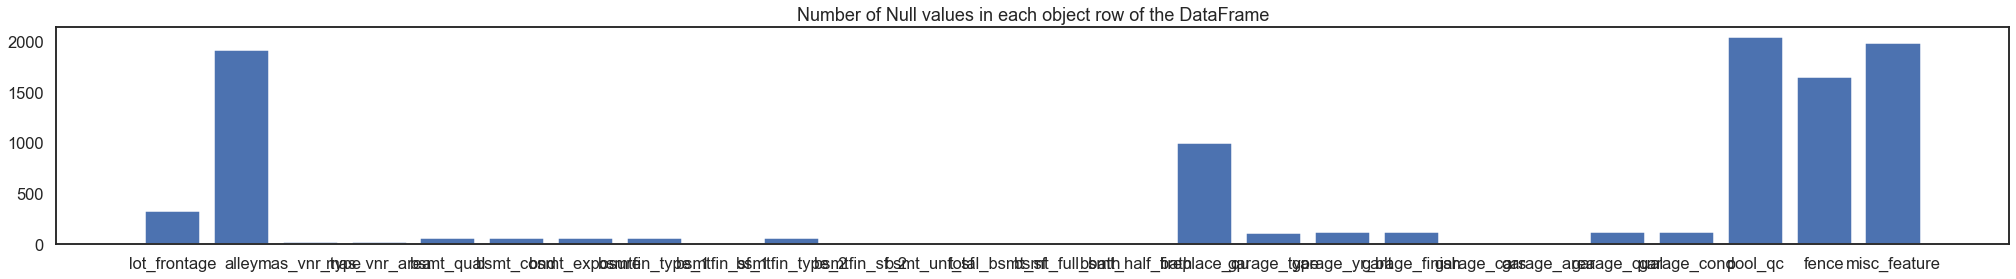

In [300]:
# A bar chart displaying how many null values in each column

plt.figure(figsize = (35, 4))

x_titles = df.columns
x_titles = [x for x in x_titles if df[x].isnull().sum() > 0]
y_values = [df[x].isnull().sum() for x in x_titles if df[x].isnull().sum() > 0]
y_values
plt.bar(
        x_titles, # X Values
        y_values, data = df
        )


plt.title('Number of Null values in each object row of the DataFrame');

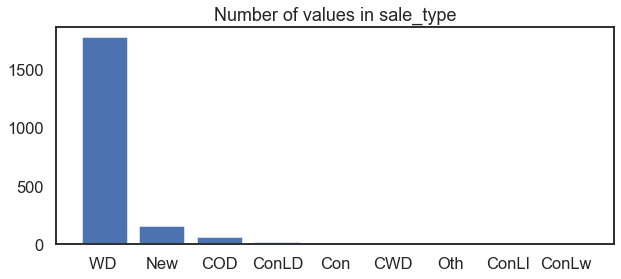

In [301]:
# We will look at how diverse the values in sale-type are. The are almost all the same. We won't use this as a variable.
thingy = 'sale_type'
cats = list(df[thingy])
c2 = []
for item in cats:
    c2.append(list(df[thingy]).count(item))

# Almost all properties are RL

plt.figure(figsize = (10, 4))

x_titles = cats
y_values = c2

plt.bar(
        x_titles, # X Values
        y_values, data = df
        )
plt.title('Number of values in sale_type');

## We we transform some columns of the data

In [302]:
# We'll binarize our central_air column. Binarize the the central air variable.
df['central_air'] = df['central_air'].map({'Y' : 1, 'N' : 0})

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

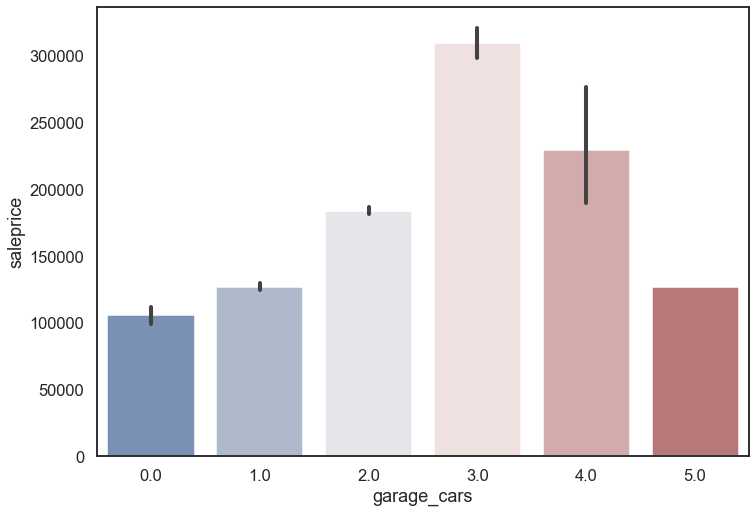

In [303]:
sns.set(style="white", context="talk", rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='garage_cars', y='saleprice', palette="vlag", data = df)#, ax=ax2)


# garage_cars isn't linearly correlated to saleprice
# Let's drop the 4's and 5's. Any house with 4 or 5 car garages is going to be a special case.

In [304]:
# There is one value in garage_cars that's null. We will delete this row.
df[df['garage_cars'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [305]:
df.drop([0, 1712], inplace = True)

In [306]:
# Let's also scale our year_built. The newest house was built in 2010, we'll set that as age = 0.
df['house_age'] = 2010 - df['year_built']

In [307]:
df.drop(columns = 'year_built', axis=0, inplace = True)

### Lets Collect the features we want to further investigate for our baseline model

In [309]:
# Features we will add to our base model
features = ['id', 'lot_area', 'overall_qual', 'overall_cond', 
            'central_air', 'full_bath', 
            'garage_cars', 'house_age', 'saleprice', 
            'ms_subclass', 'neighborhood'
             ]

In [310]:
df2 = df[features].copy()

(2049, 11)

In [312]:
# We can see there are a lot of lot_area outliers, we'll delete those. We'll only consider houses with < 30k SqFt
df2.drop((df2[df2['lot_area'] > 30_000]).index, axis=0, inplace = True)

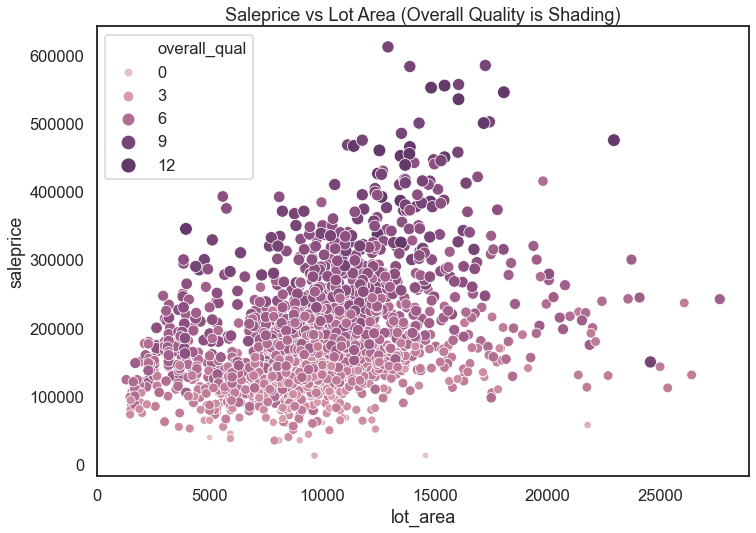

In [313]:
# Saleprice vs Lot Area
plt.title('Saleprice vs Lot Area (Overall Quality is Shading)');
sns.set(style="white", context="talk", rc={'figure.figsize':(11.7,8.27)})
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True) 
ax = sns.scatterplot(x="lot_area", y="saleprice",
                     hue="overall_qual", size="overall_qual",
                     palette=cmap,
                     data=df2)


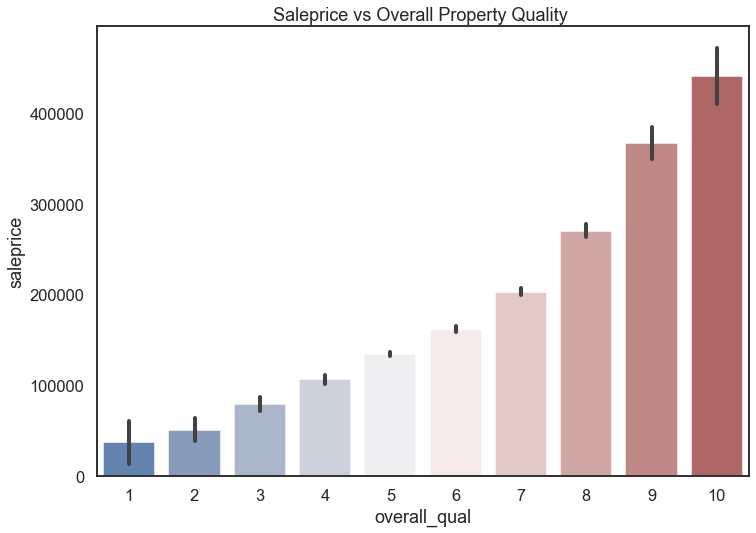

In [314]:
# Overall Quality is correlated to saleprice
plt.title('Saleprice vs Overall Property Quality ');
sns.set(style="white", context="talk", rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='overall_qual', y='saleprice', palette="vlag", data = df2)#, ax=ax2)


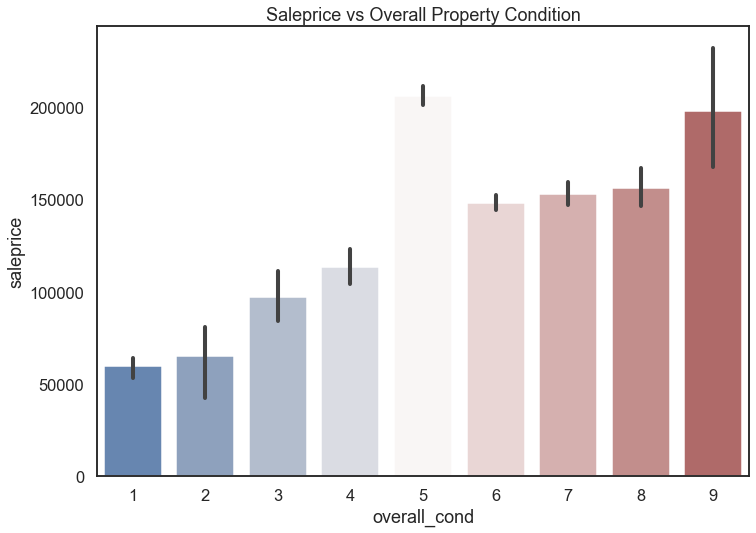

In [315]:
# House condition is loosely linear isn't linearly correlated to saleprice. I appears people only care if their properties are in average condition.
plt.title('Saleprice vs Overall Property Condition');
sns.set(style="white", context="talk", rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='overall_cond', y='saleprice', palette="vlag", data = df2)#, ax=ax2)

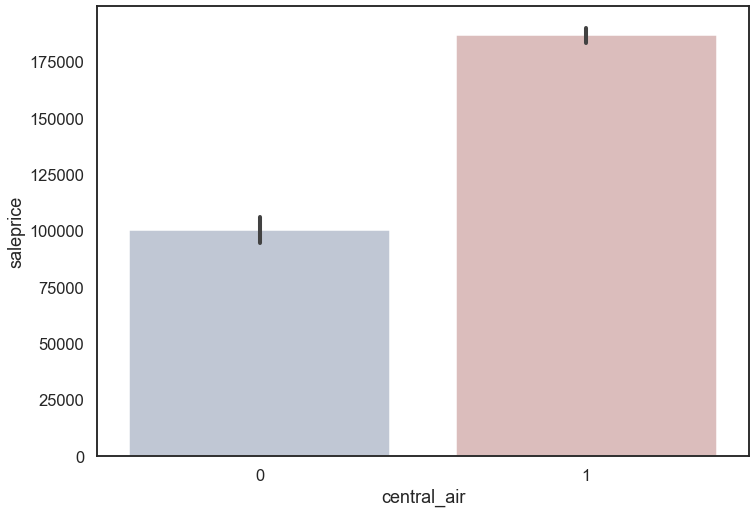

In [316]:
# The Central AC looks like an ok variable to use as a boolean
sns.set(style="white", context="talk", rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='central_air', y='saleprice', palette="vlag", data = df2)#, ax=ax2)

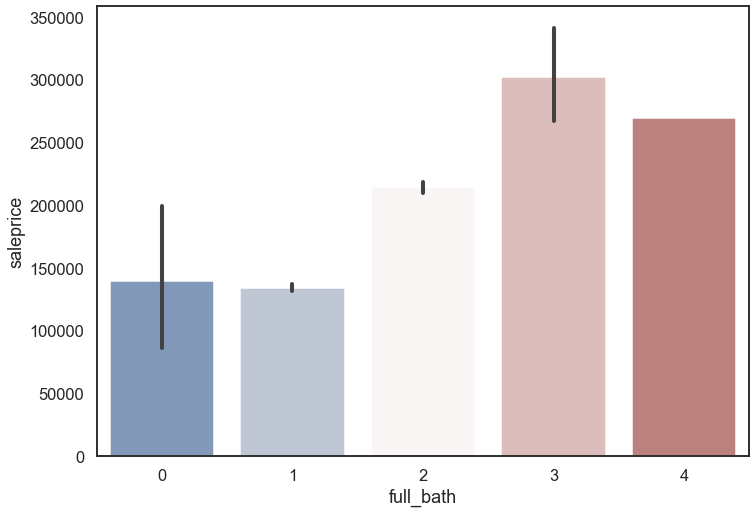

In [317]:
# We'll leave the full bata data as is, it loosely correlates with Saleprice
sns.set(style="white", context="talk", rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='full_bath', y='saleprice', palette="vlag", data = df2)#, ax=ax2)

In [318]:
# garage_cars isn't linearly correlated to saleprice
# Let's drop the 4's and 5's
df2.drop((df2[df2['garage_cars'] > 3]).index, axis=0, inplace = True)

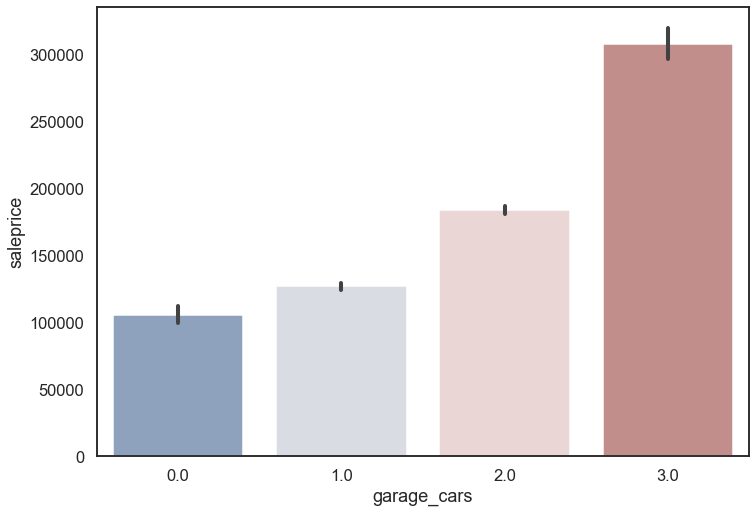

In [319]:
sns.set(style="white", context="talk", rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='garage_cars', y='saleprice', palette="vlag", data = df2)#, ax=ax2)

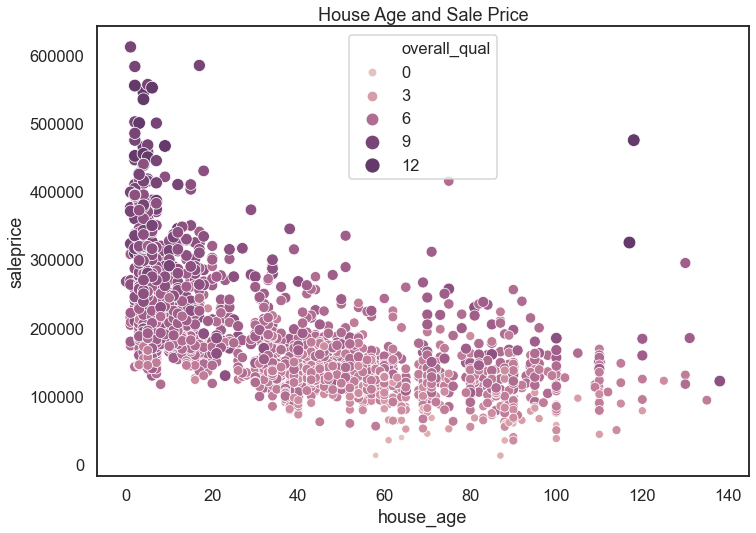

In [320]:
# Saleprice as a function of House Age. Property Quality is reflected in the shading of the dots
plt.title('House Age and Sale Price');
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="house_age", y="saleprice",
                     hue="overall_qual", size="overall_qual",
                     palette=cmap,
                     data=df2)

In [321]:
# I'll delete all houses with saleprices greater than 280,000. Houses costing more than this will not be typical.
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True), 
df2.drop((df2[df2['saleprice'] > 280_000]).index, axis=0, inplace = True)

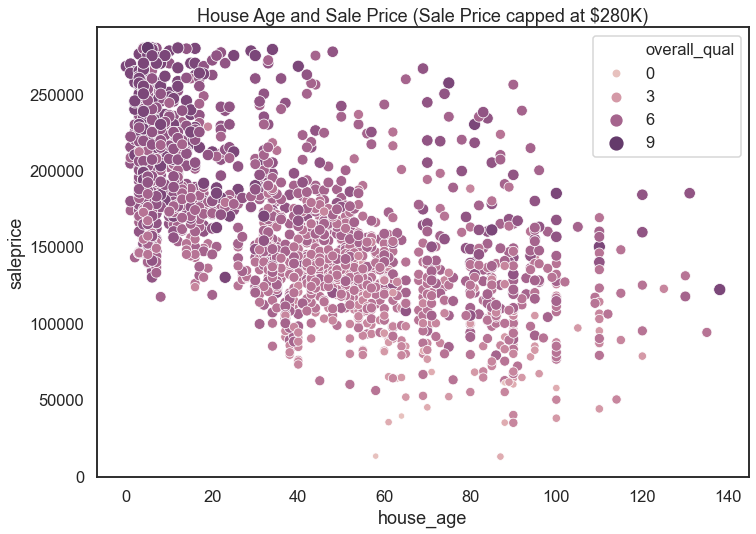

In [322]:
# Our data after removing the higher property saleprices
plt.title('House Age and Sale Price (Sale Price capped at $280K)');
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="house_age", y="saleprice",
                     hue="overall_qual", size="overall_qual",
                     palette=cmap,
                     data=df2)

## OK, Let's take a look at what we've selected

## Data Dictionary

|Feature|Type|Description|
|---|---|---|
|lot_area|float|Property Lot Square Footage|
|overall_qual|int|Property Quality Rating|
|overall_cond|int|Property Condition Rating|
|central_air|boolean|Property as Central Air|
|full_bath|int|Number of Full Bathrooms|
|garage_cars|int|Property Garage Capacity|
|house_age|int|Property Age|
|ms_subclass|int|Propety Type|
|neighborhood|string|Property Neighborhood|
|saleprice|float|Property Saleprice|

In [323]:
df2.head()

,id,lot_area,overall_qual,overall_cond,central_air,full_bath,garage_cars,house_age,saleprice,ms_subclass,neighborhood
1,544,11492,7,5,1,2,2.0,14,220000,60,SawyerW
2,153,7922,5,7,1,1,1.0,57,109000,20,NAmes
3,318,9802,5,5,1,2,2.0,4,174000,60,Timber
4,255,14235,6,8,1,2,2.0,110,138500,50,SawyerW
5,138,16492,6,6,1,2,2.0,44,190000,20,NAmes


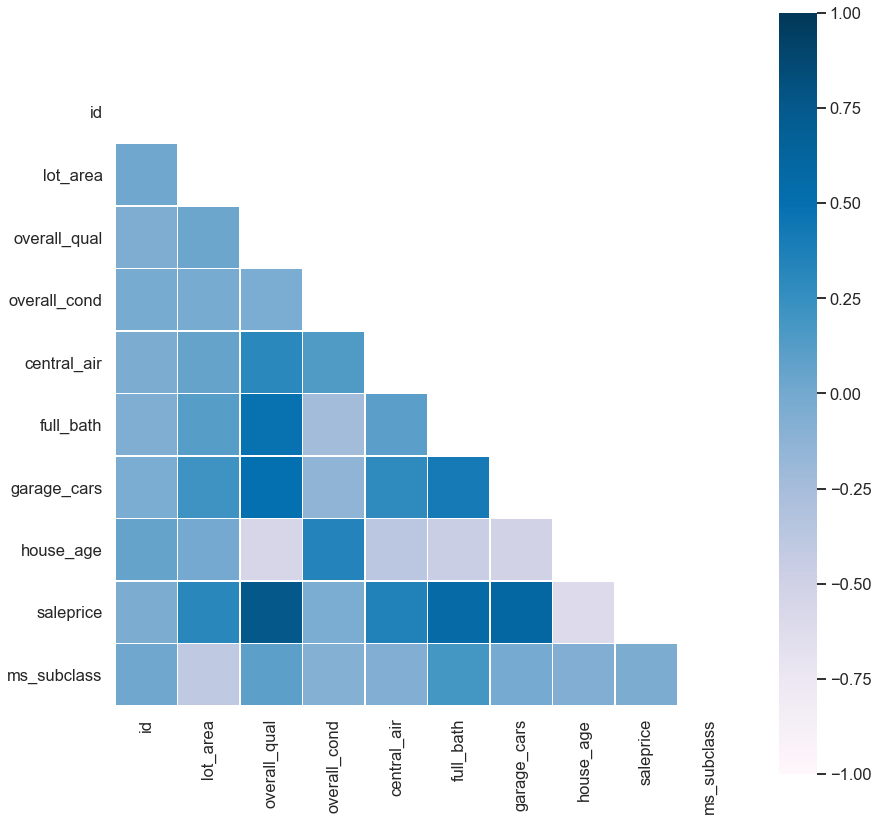

In [324]:
# Correlation matrix for our selected variables
plt.figure(figsize=(14,14))
corr = df2.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(corr,
            annot = False,
            cmap = 'PuBu',
            square = True,
            mask = mask,
            linewidths = 0.5,
            vmin = -1,
            vmax = 1
           )

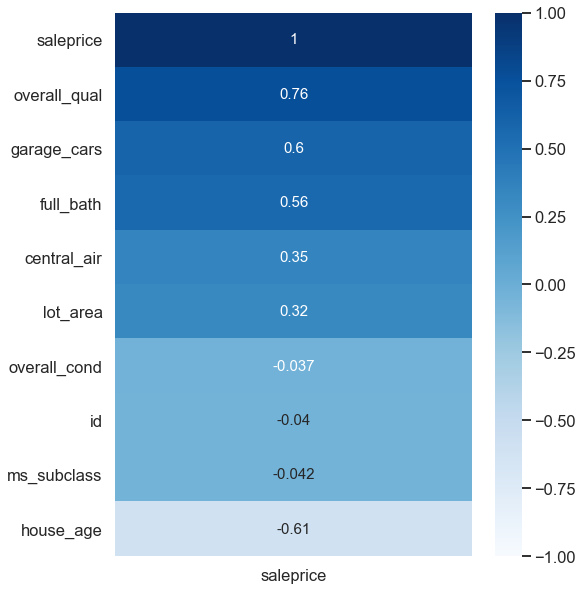

In [325]:
# Correlation heatmap of the features with our target varible (apps)
plt.figure(figsize=(8, 10))
sns.heatmap(df2.corr()[['saleprice']].sort_values('saleprice', ascending = False),
           annot=True,
            cmap='Blues',
            annot_kws={'fontsize':15},
            vmin=-1,
            vmax=1
           );

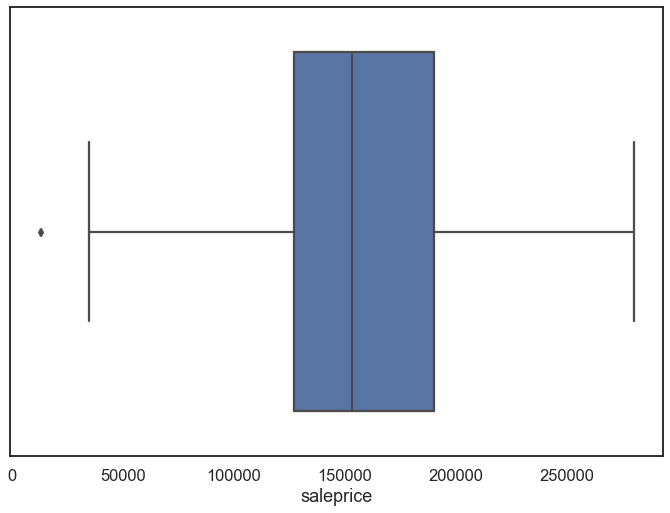

In [326]:
# Boxplot of our property saleprices. Almost all outlyers have been removed.
sns.boxplot(df2['saleprice'])

In [327]:
# Our Selected features
df2.columns

Index(['id', 'lot_area', 'overall_qual', 'overall_cond', 'central_air',
       'full_bath', 'garage_cars', 'house_age', 'saleprice', 'ms_subclass',
       'neighborhood'],
      dtype='object')

In [328]:
# We will collect our items into a dataframe
features = ['lot_area', 'overall_qual', 'overall_cond', 'central_air',
       'full_bath', 'garage_cars', 'house_age']

X = df2[features]
y = df2['saleprice']
X.head()

,lot_area,overall_qual,overall_cond,central_air,full_bath,garage_cars,house_age
1,11492,7,5,1,2,2.0,14
2,7922,5,7,1,1,1.0,57
3,9802,5,5,1,2,2.0,4
4,14235,6,8,1,2,2.0,110
5,16492,6,6,1,2,2.0,44


In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7, random_state = 42)

linreg = LinearRegression()
print('Cross Val Traing')
print(cross_val_score(linreg, X_train, y_train).mean())
print('Cross Val Test')
print(cross_val_score(linreg, X_test, y_test).mean())

# Fit the model to the training data
linreg.fit(X_train, y_train)

print('Training score (R-Squred)')
print(linreg.score(X_train, y_train))
print('Testing score (R-Squred)')
print(linreg.score(X_test, y_test))

# Lets create predictions!
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

print('Check the RMSE for training data')
print(np.sqrt(mean_squared_error(y_train, y_pred_train)))

print('Check the RMSE for the Pred data')
print(np.sqrt(mean_squared_error(y_test, y_pred_test)))

pd.DataFrame(list(zip(features, linreg.coef_/linreg.coef_.sum())), columns=['Feature', 'Coefficient']).sort_values(by='Coefficient', ascending=False)
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

Cross Val Traing
0.7599351612415205
Cross Val Test
0.7286719926175802
Training score (R-Squred)
0.7651467700079471
Testing score (R-Squred)
0.7407670973218661
Check the RMSE for training data
24068.69081452778
Check the RMSE for the Pred data
24571.916128477926


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     584.1
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        19:51:15   Log-Likelihood:                -14534.
No. Observations:                1263   AIC:                         2.908e+04
Df Residuals:                    1255   BIC:                         2.913e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.699e+04   5769.369     -6.411      0.000   -4.83e+04   -2.57e+04
lot_area         3.3798      0.190     17.759      0.000       3.006       3.753
overall_qual   1.87e+04    738.527     25.315      0.000    1.72e+04    2.01e+04
overall_cond  4894.3847    682.710      7.169      0.000    3555.006    6233.764
central_air   6422.4565   2887.608      2.224      0.026     757.386    1.21e+04
full_bath     1.572e+04   1559.508     10.079      0.000    1.27e+04    1.88e+04
garage_cars   9502.2766   1266.133      7.505      0.000    7018.306     1.2e+04
house_age     -387.0755     33.280    -11.631      0.000    -452.366    -321.785
==============================================================================
Omnibus:                       41.504   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.300
Skew:                           0.186   Prob(JB):                     1.82e-19
Kurtosis:                       4.225   Cond. No.                     8.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# This model will act as our baseline. The P values all look good, and the R score looks ok. The Model has ok bias, low variance. We will add neighborhoods as a dummy variable and add an interaction term.

In [330]:
# We will collect our items into a dataframe and then construct our input terms for our model
features = ['id', 'lot_area', 'overall_qual', 'overall_cond', 'central_air',
       'full_bath', 'garage_cars', 'house_age']

X = df2[features]
y = df2['saleprice']

# This bit of code will take our desired variable and dummify it, then add the dummies to our X dtaframe.
dummies_item4 = 'neighborhood'

d_dummies = pd.get_dummies(data=df2[dummies_item4])
for item in d_dummies:
    X[item] = d_dummies[item].astype(int)

X.drop(columns = 'Veenker', inplace = True)



X['interaction1'] = X['overall_qual'] * X['lot_area']

# We will remove neighborhood columns that have been demonstrated to be statistically insignificant to the model
columns_to_drop = ['id', 'ClearCr', 'Crawfor', 'Landmrk', 'Blueste', 'Greens', 'Sawyer', 'Timber', 'BrkSide', 'GrnHill']
X.drop(columns = columns_to_drop, inplace = True)

X.head()

/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,lot_area,overall_qual,overall_cond,central_air,full_bath,garage_cars,house_age,Blmngtn,BrDale,CollgCr,...,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,SawyerW,Somerst,StoneBr,interaction1
1,11492,7,5,1,2,2.0,14,0,0,0,...,0,0,0,0,0,0,1,0,0,80444
2,7922,5,7,1,1,1.0,57,0,0,0,...,0,0,0,0,0,0,0,0,0,39610
3,9802,5,5,1,2,2.0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,49010
4,14235,6,8,1,2,2.0,110,0,0,0,...,0,0,0,0,0,0,1,0,0,85410
5,16492,6,6,1,2,2.0,44,0,0,0,...,0,0,0,0,0,0,0,0,0,98952


In [331]:
# This cell will construct a train-test-split for us to evaluate our model
# The model is performing decently, with relatively low bias and variability in it's predictions
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7, random_state = 42)

linreg = LinearRegression()
print('Cross Val Traing')
print(cross_val_score(linreg, X_train, y_train).mean())
print('Cross Val Test')
print(cross_val_score(linreg, X_test, y_test).mean())

# Fit the model to the training data
linreg.fit(X_train, y_train)

print('Training score (R-Squred)')
print(linreg.score(X_train, y_train))
print('Testing score (R-Squred)')
print(linreg.score(X_test, y_test))

# Lets create predictions!
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

print('Check the RMSE for training data')
print(np.sqrt(mean_squared_error(y_train, y_pred_train)))

print('Check the RMSE for the Pred data')
print(np.sqrt(mean_squared_error(y_test, y_pred_test)))

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

Cross Val Traing
0.773277060409497
Cross Val Test
0.7459603787638704
Training score (R-Squred)
0.7881720598706297
Testing score (R-Squred)
0.7637484005168348
Check the RMSE for training data
22858.399611014946
Check the RMSE for the Pred data
23457.479293111286


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     176.9
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        19:51:16   Log-Likelihood:                -14469.
No. Observations:                1263   AIC:                         2.899e+04
Df Residuals:                    1236   BIC:                         2.913e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.426e+04   1.05e+04      1.363      0.173   -6266.699    3.48e+04
lot_area        -0.8278      0.923     -0.897      0.370      -2.639       0.984
overall_qual  1.039e+04   1665.893      6.234      0.000    7117.328    1.37e+04
overall_cond  5006.3078    665.563      7.522      0.000    3700.549    6312.067
central_air   7125.9279   2835.369      2.513      0.012    1563.259    1.27e+04
full_bath     1.642e+04   1564.986     10.494      0.000    1.34e+04    1.95e+04
garage_cars   8506.5774   1248.596      6.813      0.000    6056.976     1.1e+04
house_age     -341.4982     44.467     -7.680      0.000    -428.737    -254.260
Blmngtn       9541.2885   6807.754      1.402      0.161   -3814.743    2.29e+04
BrDale        -2.72e+04   6850.514     -3.970      0.000   -4.06e+04   -1.38e+04
CollgCr      -3642.0889   3093.459     -1.177      0.239   -9711.100    2426.923
Edwards      -1.136e+04   2856.782     -3.975      0.000    -1.7e+04   -5752.149
Gilbert      -8884.6912   3635.872     -2.444      0.015    -1.6e+04   -1751.529
IDOTRR       -1.327e+04   4124.287     -3.218      0.001   -2.14e+04   -5178.721
MeadowV       -1.34e+04   6297.815     -2.127      0.034   -2.58e+04   -1039.624
Mitchel      -9299.8769   3739.687     -2.487      0.013   -1.66e+04   -1963.040
NAmes        -4456.7042   2249.713     -1.981      0.048   -8870.383     -43.025
NPkVill      -2.115e+04   6481.948     -3.263      0.001   -3.39e+04   -8434.360
NWAmes       -3534.3531   3593.722     -0.983      0.326   -1.06e+04    3516.116
NoRidge       3.252e+04   1.07e+04      3.051      0.002    1.16e+04    5.34e+04
NridgHt       2.179e+04   5415.383      4.023      0.000    1.12e+04    3.24e+04
OldTown       -1.04e+04   3027.420     -3.436      0.001   -1.63e+04   -4463.931
SWISU        -6355.1225   5476.598     -1.160      0.246   -1.71e+04    4389.333
SawyerW      -1.019e+04   3743.089     -2.722      0.007   -1.75e+04   -2846.394
Somerst       8123.9196   3702.434      2.194      0.028     860.169    1.54e+04
StoneBr       1.656e+04   6628.368      2.498      0.013    3550.990    2.96e+04
interaction1     0.7027      0.153      4.604      0.000       0.403       1.002
==============================================================================
Omnibus:                       87.781   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              407.551
Skew:                           0.039   Prob(JB):                     3.17e-89
Kurtosis:                       5.782   Cond. No.                     1.06e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+06. This might indicate that there 

In [332]:
# # Let's train our model on the full dataset
# This cell will construct a model with the full data set.
# The model is performing decently, with relatively low bias and variability in it's predictions

linreg = LinearRegression()

# This will give us cross validation scores
print(f'Cross Val Score for the entire DataSet: {cross_val_score(linreg, X, y).mean()}')

linreg.fit(X, y)

# Lets create predictions!
y_pred = linreg.predict(X)

#Training score (R-Squred)
print(f'R2 score for entire DataSet: {linreg.score(X, y)}')
      
# Check the RMSE for training data.
print(f'RMSE for entire DataSet: {np.sqrt(mean_squared_error(y, y_pred))}')
      

      
X_train = sm.add_constant(X)
model = sm.OLS(y, X_train).fit()
model.summary()

Cross Val Score for the entire DataSet: 0.7730582925964289
R2 score for entire DataSet: 0.7826235366306717
RMSE for entire DataSet: 22961.654625664214


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     246.2
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        19:51:16   Log-Likelihood:                -20686.
No. Observations:                1805   AIC:                         4.143e+04
Df Residuals:                    1778   BIC:                         4.157e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.719e+04   9308.852      1.847      0.065   -1066.532    3.54e+04
lot_area        -1.2517      0.818     -1.531      0.126      -2.855       0.352
overall_qual  9789.5914   1467.481      6.671      0.000    6911.423    1.27e+04
overall_cond  4885.6348    568.201      8.598      0.000    3771.222    6000.048
central_air   8337.1269   2394.255      3.482      0.001    3641.276     1.3e+04
full_bath     1.646e+04   1324.262     12.429      0.000    1.39e+04    1.91e+04
garage_cars   8321.1484   1042.874      7.979      0.000    6275.761    1.04e+04
house_age     -318.6682     37.532     -8.490      0.000    -392.280    -245.056
Blmngtn       1.623e+04   5634.840      2.880      0.004    5179.437    2.73e+04
BrDale       -2.604e+04   5682.160     -4.582      0.000   -3.72e+04   -1.49e+04
CollgCr      -3428.9877   2601.533     -1.318      0.188   -8531.373    1673.397
Edwards       -1.35e+04   2431.933     -5.551      0.000   -1.83e+04   -8729.981
Gilbert      -1.092e+04   2949.949     -3.701      0.000   -1.67e+04   -5131.559
IDOTRR       -1.424e+04   3326.970     -4.281      0.000   -2.08e+04   -7717.905
MeadowV       -1.67e+04   5365.268     -3.112      0.002   -2.72e+04   -6174.977
Mitchel      -8318.2940   3117.948     -2.668      0.008   -1.44e+04   -2203.064
NAmes        -6779.5992   1870.656     -3.624      0.000   -1.04e+04   -3110.683
NPkVill      -2.033e+04   5999.363     -3.389      0.001   -3.21e+04   -8564.598
NWAmes       -5982.6813   2973.378     -2.012      0.044   -1.18e+04    -150.998
NoRidge       2.988e+04   6746.870      4.428      0.000    1.66e+04    4.31e+04
NridgHt       1.671e+04   4204.372      3.975      0.000    8466.896     2.5e+04
OldTown      -1.175e+04   2554.822     -4.597      0.000   -1.68e+04   -6734.390
SWISU        -1820.8943   4458.137     -0.408      0.683   -1.06e+04    6922.845
SawyerW      -7534.6767   3121.711     -2.414      0.016   -1.37e+04   -1412.067
Somerst       7207.1077   3154.109      2.285      0.022    1020.956    1.34e+04
StoneBr       1.601e+04   6123.692      2.614      0.009    3996.423     2.8e+04
interaction1     0.7793      0.135      5.786      0.000       0.515       1.044
==============================================================================
Omnibus:                      119.831   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              489.080
Skew:                           0.165   Prob(JB):                    6.28e-107
Kurtosis:                       5.529   Cond. No.                     1.09e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+06. This might indicate that there 

### Now we'll load the test data, clean it, and produce a prediction file for kaggle.

In [333]:
# First we'll read in our dataset, sort them by id, and then clean up the column names a bit
dft = pd.read_csv('datasets/test.csv')
dft.columns = [x.lower() for x in dft.columns]  # lowercase all column titles
dft.columns = dft.columns.str.replace(' ', '_')
dft = dft.sort_values(by='id')

In [334]:
dft.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
703,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD
705,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2010,WD
119,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,6,2010,WD
311,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2010,WD
400,17,527225035,50,RL,152.0,12134,Pave,NaN,IR1,Bnk,...,0,0,0,NaN,NaN,NaN,0,6,2010,WD


In [335]:
# We'll binarize our central_air column
dft['central_air'] = dft['central_air'].map({'Y' : 1, 'N' : 0})

In [336]:
# Add a column for house age to be used instead of year built
dft['house_age'] = 2010 - dft['year_built']
dft.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,house_age
703,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,49
705,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,42
119,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,12
311,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,9
400,17,527225035,50,RL,152.0,12134,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,NaN,0,6,2010,WD,22


In [337]:
# In this cell we will contruct our model
features = ['id', 'lot_area', 'overall_qual', 'overall_cond', 'central_air',
       'full_bath', 'garage_cars', 'house_age']

X_t = dft[features]

# This bit of code will take our desired variable and dummify it, then add the dummies to our X_t dataframe.
dummies_item4 = 'neighborhood'

d_dummies = pd.get_dummies(data=dft[dummies_item4])
for item in d_dummies:
    X_t[item] = d_dummies[item].astype(int)

X_t.drop(columns = 'Veenker', inplace = True)

# We'll add our interaction term
X_t['interaction1'] = X_t['overall_qual'] * X_t['lot_area']

# We will remove neighborhood columns that have been demonstrated to be statistically insignificant to the model
columns_to_drop = ['id', 'ClearCr', 'Crawfor', 'Blueste', 'Greens', 'Sawyer', 'Timber', 'BrkSide']#, 'StoneBr']
X_t.drop(columns = columns_to_drop, inplace = True)

X_t.shape

/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Library/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

(878, 26)

In [338]:
# Lets create predictions!
y_pred_t = linreg.predict(X_t)

In [339]:
# Create a DataFrame with our ID's and our Predictions
out_pd = [[]]
out_pd = pd.DataFrame(list(zip(dft['id'], y_pred_t)), columns=['Id', 'SalePrice'])
out_pd.head()

,Id,SalePrice
0,2,136917.453486
1,4,194795.527091
2,6,182568.732497
3,7,215490.402894
4,17,230143.139851


In [340]:
#Create a new DataFrame of just the rows I want to export
out_csv = out_pd.loc[0:878, :]
out_csv.shape

(878, 2)

In [1040]:
# Uncomment the line below if you would like an output csv file created
# out_csv.to_csv('jared3.csv', index=False)

## That's all folks.